In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns

In [59]:
X,y = make_blobs(centers=3, random_state=42)


In [60]:
X

array([[-7.72642091, -8.39495682],
       [ 5.45339605,  0.74230537],
       [-2.97867201,  9.55684617],
       [ 6.04267315,  0.57131862],
       [-6.52183983, -6.31932507],
       [ 3.64934251,  1.40687195],
       [-2.17793419,  9.98983126],
       [ 4.42020695,  2.33028226],
       [ 4.73695639,  2.94181467],
       [-3.6601912 ,  9.38998415],
       [-3.05358035,  9.12520872],
       [-6.65216726, -5.57296684],
       [-6.35768563, -6.58312492],
       [-3.6155326 ,  7.8180795 ],
       [-1.77073104,  9.18565441],
       [-7.95051969, -6.39763718],
       [-6.60293639, -6.05292634],
       [-2.58120774, 10.01781903],
       [-7.76348463, -6.72638449],
       [-6.40638957, -6.95293851],
       [-2.97261532,  8.54855637],
       [-6.9567289 , -6.53895762],
       [-7.32614214, -6.0237108 ],
       [-2.14780202, 10.55232269],
       [-2.54502366, 10.57892978],
       [-2.96983639, 10.07140835],
       [ 3.22450809,  1.55252436],
       [-6.25395984, -7.73726715],
       [-7.85430886,

<AxesSubplot:>

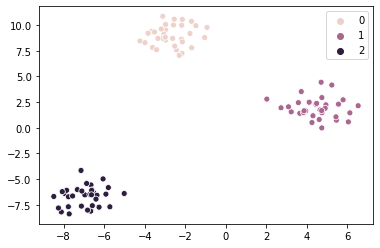

In [61]:
sns.scatterplot(X[:,0],X[:,1] , hue = y) # using y (however k means has no y, therefore we cant uses this)

In [62]:
model = KMeans(n_clusters=2)

In [63]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
y_gen = model.labels_

<AxesSubplot:>

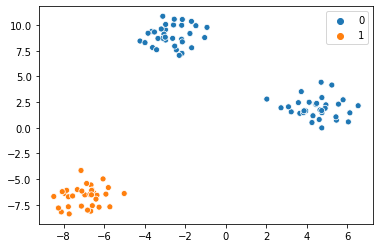

In [65]:
sns.scatterplot(X[:,0],X[:,1],hue=y_gen)

In [66]:
model.cluster_centers_

array([[ 0.86236563,  5.48955564],
       [-6.95170962, -6.67621669]])

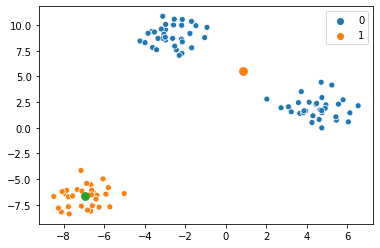

In [67]:
sns.scatterplot(X[:,0],X[:,1],hue=y_gen)
for center in model.cluster_centers_:
    plt.scatter(center[0],center[1], s=60)

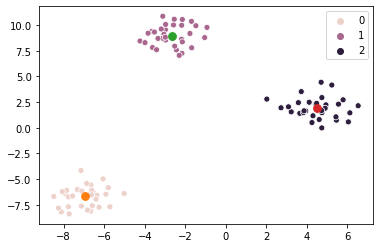

In [68]:
model = KMeans(n_clusters=3)
model.fit(X)
y_gen = model.labels_
sns.scatterplot(X[:,0],X[:,1],hue=y_gen)
for center in model.cluster_centers_:
    plt.scatter(center[0],center[1], s=60)

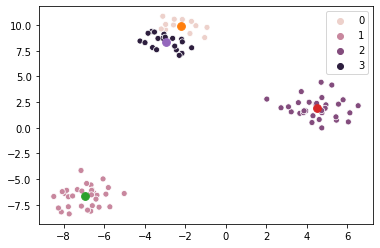

In [69]:
model = KMeans(n_clusters=4)
model.fit(X)
y_gen = model.labels_
sns.scatterplot(X[:,0],X[:,1],hue=y_gen)
for center in model.cluster_centers_:
    plt.scatter(center[0],center[1], s=60)

In [70]:
import random

In [81]:
class Cluster:
    def __init__(self,center):
        self.center = center
        self.points =[]
        
    def distance(self,point):
         return np.sqrt(np.sum(point - self.center)**2)
        
    
    
    
class CustomKMeans:
    def __init__(self,n_clusters=3,max_iters=20):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
    
    def fit(self,X):
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(center = random.choice(X))
            clusters.append(cluster)
        
        for i in range(self.max_iters):
            labels = []
            
            for point in X:
                distances = []
                for cluster in clusters:
                        distances.append(cluster.distance(point))

                closest_idx = np.argmin(distances)
                closest_cluster = clusters[closest_idx]
                closest_cluster.points.append(point)
                labels.append(closest_idx)

            for point in clusters:
                cluster.center = np.mean(cluster.points, axis =0)

            #print(clusters,labels)

        
        self.labels = labels
        self.cluster_centers_ =  [cluster.center for cluster in clusters]
        
            
        

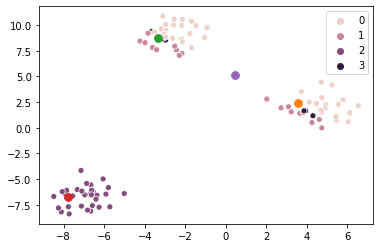

In [82]:
model = CustomKMeans(n_clusters=4)
model.fit(X)
sns.scatterplot(X[:,0],X[:,1], hue = model.labels)
for center in model.cluster_centers_:
    plt.scatter(center[0],center[1],s=60)

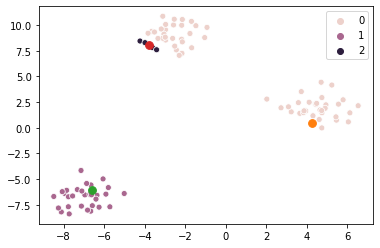

In [83]:
model = CustomKMeans(n_clusters=3)
model.fit(X)
sns.scatterplot(X[:,0],X[:,1], hue = model.labels)
for center in model.cluster_centers_:
    plt.scatter(center[0],center[1],s=60)

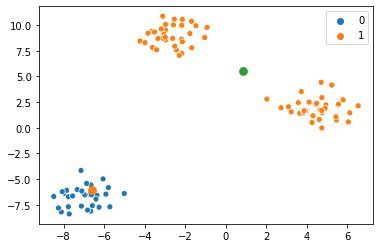

In [84]:
model = CustomKMeans(n_clusters=2)
model.fit(X)
sns.scatterplot(X[:,0],X[:,1], hue = model.labels)
for center in model.cluster_centers_:
    plt.scatter(center[0],center[1],s=60)